In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Okt

In [2]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('bellepork.txt')

In [3]:
test_data

,id,document,label
0,1,뜻밖의 감동과 여운이 길게 남는 영화. 마지막 엔딩 꼭 놓치지 마세요. 눈물이 왈칵...,1
1,2,제 마음이 다 설레였어요 너무너무 좋았습니다!,1
2,3,내 '벨에포크'는 언제인지 생각하게 되는 영화! 영상미도 너무 이쁘고 무엇보다 핸드...,1
3,4,매력적인 시간여행 로맨스! 아 이 맛에 로맨스 영화 보는거지 싶었다. 소중한 사람이...,1
4,5,내 첫사랑처럼 귀엽고 소중해서 마음속에 영원히 간직하고 싶은 영화네요~ 꼭 한번 봐보세요,1
5,6,"이런 시간여행 영화라면 언제든지 반갑다!! 당장 내가 떠나고 싶은, 주변 사람들에게...",1
6,7,너무 사랑스럽고 아름다운 영화. 다니엘 오떼유와 화니 아르당의 연기가 허를 찌른다....,1
7,8,생각지도 못하게 감동을 느낄 수 있었던 영화! 요즘 같은 때에 힘든 마음에 위로가 ...,1
8,9,오랜만에 극장에서 몰입해서 영화 본 것 같다. 시간여행 영화를 원래 좋아하지만 핸드...,1
9,10,진짜 개강추 올해 본 영화 중 가장 영화다운 영화였음,1


In [4]:
train_data.drop_duplicates(subset=['document'], inplace=True) # 중복데이터 제거
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 146183


In [5]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거  //dropna(how = 'any') 행안에 NA값이 하나라도 있으면 그행을 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인 
print('총 샘플의 수 :',len(train_data))

False
총 샘플의 수 : 146182


In [6]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [7]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    391
label         0
dtype: int64


In [8]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145791


In [9]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 30
전처리 후 테스트용 샘플의 개수 : 30
전처리 후 테스트용 샘플의 개수 : 30
전처리 후 테스트용 샘플의 개수 : 30


In [10]:
test_data

,id,document,label
0,1,뜻밖의 감동과 여운이 길게 남는 영화 마지막 엔딩 꼭 놓치지 마세요 눈물이 왈칵 나...,1
1,2,제 마음이 다 설레였어요 너무너무 좋았습니다,1
2,3,내 벨에포크는 언제인지 생각하게 되는 영화 영상미도 너무 이쁘고 무엇보다 핸드메이드...,1
3,4,매력적인 시간여행 로맨스 아 이 맛에 로맨스 영화 보는거지 싶었다 소중한 사람이랑 ...,1
4,5,내 첫사랑처럼 귀엽고 소중해서 마음속에 영원히 간직하고 싶은 영화네요 꼭 한번 봐보세요,1
5,6,이런 시간여행 영화라면 언제든지 반갑다 당장 내가 떠나고 싶은 주변 사람들에게 마구...,1
6,7,너무 사랑스럽고 아름다운 영화 다니엘 오떼유와 화니 아르당의 연기가 허를 찌른다 이...,1
7,8,생각지도 못하게 감동을 느낄 수 있었던 영화 요즘 같은 때에 힘든 마음에 위로가 되...,1
8,9,오랜만에 극장에서 몰입해서 영화 본 것 같다 시간여행 영화를 원래 좋아하지만 핸드메...,1
9,10,진짜 개강추 올해 본 영화 중 가장 영화다운 영화였음,1


In [11]:
stopwords = ['아','어','의','을','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','보다','이다','있다']
#불용어는 좀더 찾아보고 추가해봐야할거같음
okt=Okt()

불용어란 자주 등장하지만 데이터를 분석하는데 있어 큰 의미를 갖지 않는 단어들을 뜻합니다. 
불용어는 임의로 설정할 수 도 있고, 영문의 불용어 리스트의 경우 NTLK 라이브러리에서 정의한 불용어 리스트를 사용할 수 있습니다. 
다만 한국어의 경우 조사와 접속사의 사용이 다양하며, 언어의 변형이 많기 때문에 직접 정의하는게 좋습니다.

https://leo-bb.tistory.com/5

In [12]:
X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [13]:
X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) #텍스트의 단어 빈도를 기준으로 업데이트

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer


In [15]:
print(tokenizer.word_index)

{'영화': 1, '없다': 2, '좋다': 3, '너무': 4, '다': 5, '정말': 6, '되다': 7, '재밌다': 8, '적': 9, '만': 10, '같다': 11, '진짜': 12, '로': 13, '아니다': 14, '않다': 15, '점': 16, '에서': 17, '만들다': 18, '나오다': 19, '연기': 20, '것': 21, '평점': 22, '내': 23, '최고': 24, '그': 25, '나': 26, '안': 27, '인': 28, '스토리': 29, '생각': 30, '못': 31, '왜': 32, '드라마': 33, '게': 34, '감동': 35, '사람': 36, '보고': 37, '이렇다': 38, '말': 39, '고': 40, '아깝다': 41, '더': 42, '배우': 43, '때': 44, 'ㅋㅋ': 45, '감독': 46, '거': 47, '그냥': 48, '재미있다': 49, '요': 50, '재미': 51, '시간': 52, '내용': 53, '뭐': 54, '까지': 55, '중': 56, '주다': 57, '자다': 58, '하고': 59, '지루하다': 60, '재미없다': 61, '쓰레기': 62, '수': 63, '네': 64, '모르다': 65, '가다': 66, '들다': 67, '그렇다': 68, '싶다': 69, '지': 70, '작품': 71, '사랑': 72, '알다': 73, '하나': 74, '다시': 75, '마지막': 76, '볼': 77, '이건': 78, '정도': 79, '저': 80, '완전': 81, '오다': 82, 'ㅋ': 83, 'ㅠㅠ': 84, '많다': 85, '처음': 86, 'ㅋㅋㅋ': 87, '장면': 88, '액션': 89, '주인공': 90, '이렇게': 91, '안되다': 92, '걸': 93, '차다': 94, '나다': 95, '개': 96, '하': 97, '최악': 98, '돈': 99, '이야기': 100, '지금': 101, '넘다':

In [16]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():#tokenizer.word_counts.items()??
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43746
등장 빈도가 2번 이하인 희귀 단어의 수: 24337
단어 집합에서 희귀 단어의 비율: 55.63251497279751
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.9893832220884269


In [17]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 19410


In [18]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)

정수 인코딩 과정에서 vocab_size보다 큰 숫자는 제외된다.
texts_to_sequences(texts)
텍스트의 각 텍스트를 일련의 정수로 변환합니다.

In [19]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [20]:
print("y_train",y_train.dtype)

y_train int64


In [21]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [22]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145099
145099


세로 : 행이 증가하는 방향 (axis = 0)

가로 : 열이 증가하는 방향 (axis = 1)

In [23]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

30
30


In [24]:
print("X_test",X_test.dtype)
print("X_train",X_train.dtype)
print("y_test",y_test.dtype)
print("y_train",y_train.dtype)

X_test object
X_train object
y_test int64
y_train int64


리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 10.164453235377225


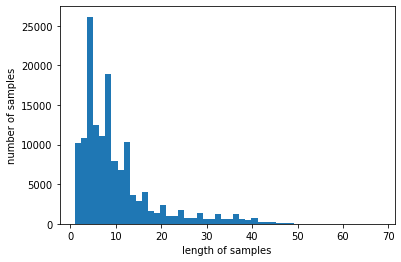

In [25]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [26]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [27]:
max_len = 30
below_threshold_len(max_len, X_train)
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 95.15227534304165


In [28]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

RMSprop :일반적으로 순환 신경망(Recurrent Neural Networks)의 옵티마이저로 많이 사용됩니다
https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/keras/layers/LSTM

In [29]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=30))
model.add(LSTM(128, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1941000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,058,377
Trainable params: 2,058,377
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Train on 116079 samples, validate on 29020 samples
Epoch 1/10
116079/116079 [==============================] - 42s 358us/sample - loss: 0.3919 - acc: 0.8229 - val_loss: 0.3534 - val_acc: 0.8425
Epoch 2/10
116079/116079 [==============================] - 41s 351us/sample - loss: 0.3313 - acc: 0.8556 - val_loss: 0.3354 - val_acc: 0.8544
Epoch 3/10
116079/116079 [==============================] - 41s 356us/sample - loss: 0.3073 - acc: 0.8695 - val_loss: 0.3301 - val_acc: 0.8578
Epoch 4/10
116079/116079 [==============================] - 42s 359us/sample - loss: 0.2888 - acc: 0.8787 - val_loss: 0.3321 - val_acc: 0.8582
Epoch 5/10
116079/116079 [==============================] - 41s 354us/sample - loss: 0.2740 - acc: 0.8872 - val_loss: 0.3282 - val_acc: 0.8611
Epoch 6/10
116079/116079 [==============================] - 41s 352us/sample - loss: 0.2596 - acc: 0.8946 - val_loss: 0.3347 - val_acc: 0.8572
Epoch 7/10
116079/116079 [==============================] - 41s 353us/sample - loss: 0.2460

In [32]:
print("정확도: %.4f" % model.evaluate(X_test, y_test)[1]) 

30/30 [==============================] - 0s 233us/sample - loss: 0.1611 - acc: 0.9000
정확도: 0.9000


In [33]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 199us/sample - loss: 0.1611 - acc: 0.9000


[0.16107942163944244, 0.9]

In [38]:
model.predict_on_batch(X_test)

<tf.Tensor: shape=(30, 1), dtype=float32, numpy=
array([[0.9977417 ],
       [0.9982029 ],
       [0.9918594 ],
       [0.98132724],
       [0.9971385 ],
       [0.9958748 ],
       [0.9913464 ],
       [0.99402446],
       [0.9970727 ],
       [0.9781652 ],
       [0.99661875],
       [0.9962603 ],
       [0.99858105],
       [0.925885  ],
       [0.9825402 ],
       [0.9976186 ],
       [0.9970542 ],
       [0.98777884],
       [0.99288803],
       [0.96425414],
       [0.596702  ],
       [0.3081145 ],
       [0.99550384],
       [0.5897346 ],
       [0.9404994 ],
       [0.30135134],
       [0.3820529 ],
       [0.8741307 ],
       [0.9965463 ],
       [0.99695265]], dtype=float32)>

In [39]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1]])